In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras import models, layers, optimizers, utils, Input
from keras.optimizers import Adam
from keras.datasets import fashion_mnist 

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"x_train: {x_train.shape}, y_train: {y_train.shape} , x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), y_train: (50000, 1) , x_test: (10000, 32, 32, 3), y_test: (10000, 1)


In [3]:
num_classes = 10  # загальна кількість класів від 0 до 9
num_features = 784  # кількість атрибутів вхідного вектора 28 * 28 = 784
classes = { 0:"airplane(літак)", 
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

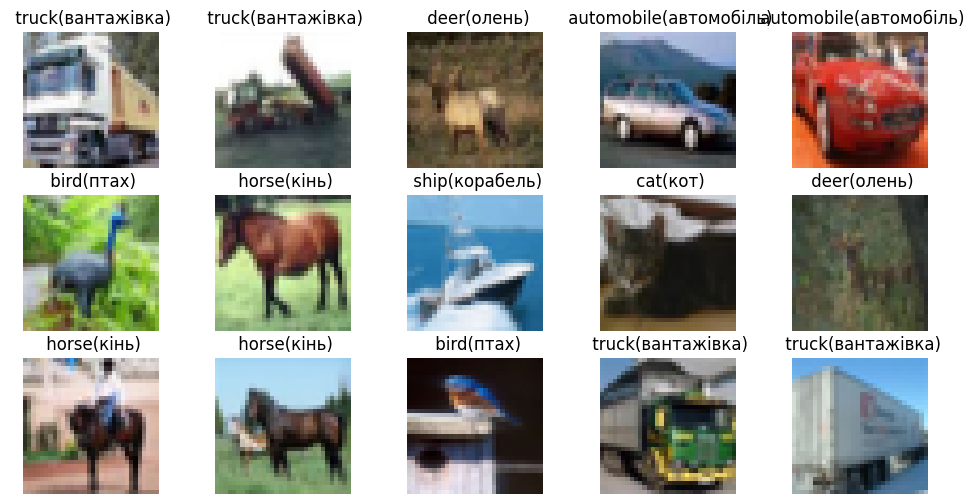

In [4]:
plt.figure(figsize=(12,6))
for i in range(1, 16):
  plt.subplot(3, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("x_train normalize shape", x_train.shape)
print("x_test normalize shape", x_test.shape)

x_train normalize shape (50000, 32, 32, 3)
x_test normalize shape (10000, 32, 32, 3)


In [6]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Перетворення матриці розміром 28x28 пікселів у вектор 
x_train, x_valid, x_test = x_train.reshape(x_train.shape[0], 32, 32, 3 ), x_valid.reshape(x_valid.shape[0], 32, 32, 3), x_test.reshape(10000,32, 32, 3 )

# Нормалізація значення пікселів
# x_train, x_test = x_train.astype("float32") / 255, x_test.astype("float32") / 255
y_train, y_valid, y_test = utils.to_categorical(y_train, num_classes), utils.to_categorical(y_valid, num_classes), utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape},        y_test: {y_test.shape}")
print(f"x_valid: {x_valid.shape},  y_valid: {y_valid.shape}")

x_train: (45000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (45000, 10),        y_test: (10000, 10)
x_valid: (5000, 32, 32, 3),  y_valid: (5000, 10)


In [7]:
print(  'train ', x_train.shape) 

train  (45000, 32, 32, 3)


In [8]:
model = models.Sequential([
    Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 128)         │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,137,290 (8.15 MB)

 Trainable params: 2,137,290 (8.15 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(  optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [11]:

history = model.fit(x_train, y_train, epochs=50,batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 161s 211ms/step - accuracy: 0.3339 - loss: 1.8176 - val_accuracy: 0.5650 - val_loss: 1.2668
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 192s 197ms/step - accuracy: 0.5467 - loss: 1.2658 - val_accuracy: 0.5968 - val_loss: 1.1534
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 152s 216ms/step - accuracy: 0.5952 - loss: 1.1378 - val_accuracy: 0.6562 - val_loss: 0.9972
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 151s 214ms/step - accuracy: 0.6322 - loss: 1.0358 - val_accuracy: 0.6636 - val_loss: 0.9348
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 153s 216ms/step - accuracy: 0.6531 - loss: 0.9776 - val_accuracy: 0.7008 - val_loss: 0.8842
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 144s 205ms/step - accuracy: 0.6754 - loss: 0.9143 - val_accuracy: 0.7056 - val_loss: 0.8627
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 153s 217ms/step - accuracy: 0.6907 - loss: 0.8768 - val_accuracy: 0.7176 - val_loss: 0.8057
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 199s 213ms/step - accuracy: 0.7068 -

In [12]:
result_test = model.evaluate(x_test, y_test)
# result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
# print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7409 - loss: 0.8722
Відсоток точності тестових даних:  74.17


In [13]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


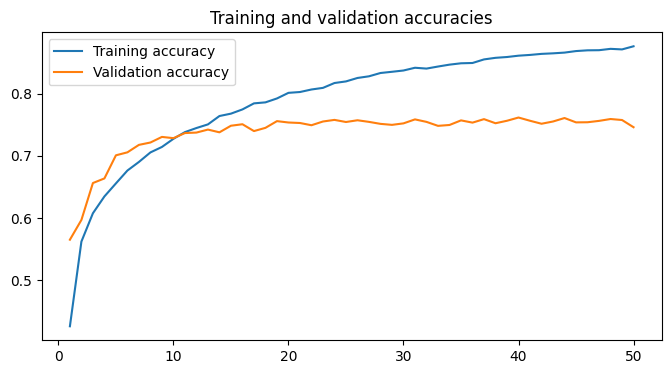

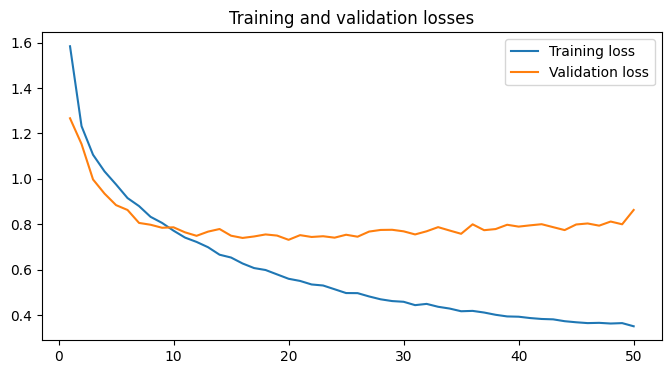

In [14]:
epochs = range(1, len(history.history["accuracy"]) + 1) 

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy") 
plt.title("Training and validation accuracies") 
plt.legend() 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history.history["loss"],  label="Training loss") 
plt.plot(epochs, history.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

In [15]:
model.save("basesd_model_CNN.hdf5")

In [16]:
# model = models.load_model("basesd_model_11.hdf5")

Донавчання